# **Ejercicios de NumPy**

In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


## Pregunta 1
Crea los siguientes arreglos con los tipos correctos. 
- Un arreglo de $5 \times 5$ cuya diagonal sean $[2.0, 3.0, 4.0, 5.0]$
- Un arreglo de $4 \times 4$ cuyo último renglón sea $[1,2,3,4]$ y el resto sean $0$.

In [2]:
lista=list(range(1,6))
ListaSuprema=[]
for i in range(5):
    ListaSuprema.append(lista)
arr1=np.array(ListaSuprema).astype(np.float16)
print(arr1)

[[1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]
 [1. 2. 3. 4. 5.]]


In [3]:
arr2=np.zeros((4,4)).astype(int)
arr2[3]=np.arange(1,5).astype(int)
print(arr2)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 2 3 4]]


## Pregunta 2
En este ejercicio realizaremos una [**criba de Eratóstenes**](http://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)


<div class="alert alert-warning">
**Nota**: Ejercicio basado en el presentado en `C4P`.
</div>

(a) Crea un arreglo de booleanos de **shape** `(100,)`, con todos sus elementos `True`.  El índice representa el número.

In [4]:
bool_arr = np.ones((100,), dtype=bool)
print(bool_arr)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


(b) "Tacha" los elementos `0` y `1`.

In [5]:
bool_arr[0]=False
bool_arr[1]=False

(c) Para cada entero subsiguiente, tacha sus múltiplos. Una manera de hacerlo es el código que se muestra. Explica que hace el código, sobretodo explica que hace el *slicing*.

In [6]:
N_max = int(np.sqrt(len(bool_arr)))
for j in range(2, N_max):
    bool_arr[2*j::j] = False

#Este método funciona así:
#1. Se obtiene la raíz cuadrada de la longitud del arreglo, ya que alguna potencia mayor a dos de algún número mayor a la raíz obtenida queda fuera del intervalo
#2. Se convierten en falso todos los múltiplos de j, para toda j menor a la raíz obtenida en el inciso anterior
    #2.1 El slicing funciona así:
        #2.1.1 Empieza en el doble de j y termina en el final del array y se dan saltos de tamaño j para eliminar los múltiplos de j

In [7]:
#Otra manera de hacerlo es yendo de 2 al final del arreglo y empezando en el cuadrado de j y dando saltos de tamaño j y así se repiten menos procesos
bool_ar = np.ones((100,), dtype=bool)
N_max = int(np.sqrt(len(bool_ar)))
for j in range(2, N_max):
    bool_ar[j*j::j] = False
#Este método funciona así:
#1. Se obtiene la raíz cuadrada de la longitud del arreglo, ya que alguna potencia mayor a dos de algún número mayor a la raíz obtenida queda fuera del intervalo
#2. Se convierten en falso el cuadrado j y los múltiplos de j, para toda j menor a la raíz obtenida en el inciso anterior
    #2.1 El slicing funciona así:
        #2.1.1 Empieza en el cuadrado de j y termina en el final del array y se dan saltos de tamaño j para eliminar los múltiplos de j


(d) Mira la documentacion de np.nonzero para imprimir todos los números primos.

In [8]:
np.nonzero(bool_arr)

(array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
        61, 67, 71, 73, 79, 83, 89, 97]),)

(e) Encapsula lo que acabamos de hacer en una función llamada criba_eratostenes, que reciba como argumento maximo el cual representa el tamaño del array. Muestra el resultado para maximo = {10, 100, 200}, usando un for.

In [9]:
def criba_eratostenes(n):
    bool_arr = np.ones((n,), dtype=bool)
    bool_arr[0]=False
    bool_arr[1]=False
    N_max = int(np.sqrt(len(bool_arr)))
    for j in range(2, N_max):
        bool_arr[2*j::j] = False
    print(np.nonzero(bool_arr))

In [10]:
conjunto=[10,100,200]
for i in conjunto: 
    print('\nLos número primos de ', i, 'son: ')
    criba_eratostenes(i)



Los número primos de  10 son: 
(array([2, 3, 5, 7, 9]),)

Los número primos de  100 son: 
(array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
       61, 67, 71, 73, 79, 83, 89, 97]),)

Los número primos de  200 son: 
(array([  2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,  41,
        43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97, 101,
       103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167,
       173, 179, 181, 191, 193, 197, 199]),)


## Pregunta 3
Crea un [cubo rubik](http://en.wikipedia.org/wiki/Rubik%27s_Cube), partiendo de un arreglo de ceros y usando *slicing* dibuja cada una de las caras como si estuviera resuelto (cada color un entero a partir del $1$). Muestra con *indexing* que está resuelto (es decir, imprime las seis caras). ¿Cuántos elementos del arreglo quedaron en $0$?

In [11]:
rubik=np.zeros((6,3,3)).astype(int)
for i in range (6):
    rubik[i]=i+1
print(rubik)

[[[1 1 1]
  [1 1 1]
  [1 1 1]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]]

 [[4 4 4]
  [4 4 4]
  [4 4 4]]

 [[5 5 5]
  [5 5 5]
  [5 5 5]]

 [[6 6 6]
  [6 6 6]
  [6 6 6]]]


## Pregunta 4
El **Sudoku** es un pasatiempo que consiste en un arreglo  $9 \times 9$ de celdas, con dígitos del 1 al 9, de tal manera que no se repiten valores en cada columna, cada renglón y en cada subarreglo de $3\times 3$.


(a) Crea una función llamada `correcto` que reciba un `array` $1d$ de tamaño 9 e indique si está completo o no (i.e. incluye los números del 1 al 9).

In [12]:
def correcto(arr):
    bandera=True
    arreglo_bool = np.zeros((9,), dtype=bool)
    try:
        arr.reshape((9,))  
        for i in range(1,10):
            x=(i==arr)
            if np.any(x)==False:
                bandera=False
                break
        if bandera==True:
            print('El arreglo está completo')
        else:
            print('El arreglo está incompleto')
    except:
        print('Ingrese un arreglo de tamaño 1X9')
        bandera=False
   
    return bandera

In [13]:
#Ejemplo
a=np.array([4,1,2,3,5,6,7,8,9])
#x=a.reshape((10,))
correcto(a)

b=np.array([1,1,2,3,5,6,7,8,9])
#x=a.reshape((10,))
correcto(b)

c=np.array([4,1,2,3,5,6,7,8])
#x=a.reshape((10,))
correcto(c)

El arreglo está completo
El arreglo está incompleto
Ingrese un arreglo de tamaño 1X9


False

(b) Crea una función llamada `descomponer3x3` que reciba un `array` de enteros de $9\times 9$ y lo separe en sus 9 subarreglos $3\times3$.

In [14]:
def descomponer3x3(arr):
    try:
        arr933=arr.reshape((9,3,3))
    except:
        print('Ingrese un arreglo de 9x9')
    return arr933
    

In [15]:
#Ejemplo
arreglo1=np.arange(81)
v=descomponer3x3(arreglo1)
print(v)
print(v.shape)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]

 [[27 28 29]
  [30 31 32]
  [33 34 35]]

 [[36 37 38]
  [39 40 41]
  [42 43 44]]

 [[45 46 47]
  [48 49 50]
  [51 52 53]]

 [[54 55 56]
  [57 58 59]
  [60 61 62]]

 [[63 64 65]
  [66 67 68]
  [69 70 71]]

 [[72 73 74]
  [75 76 77]
  [78 79 80]]]
(9, 3, 3)


(c) Crea la función `esSolucion` que recibe un `array` de $9\times 9$ y devuelve si es o no solución del sudoku.

In [16]:
v[:3,2,:]

array([[ 6,  7,  8],
       [15, 16, 17],
       [24, 25, 26]])

In [17]:
v[0,:,:]

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [18]:
v[:3,:,0]

array([[ 0,  3,  6],
       [ 9, 12, 15],
       [18, 21, 24]])

In [19]:
def esSolucion(arr):
    bandera=True
    for i in range(10):
        V=arr[i,:,]
        bandera=correcto(V)
    return bandera
        

In [20]:
print(esSolucion(arreglo1))

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [21]:
ARR=v[0,:,]
print(correcto(ARR))

El arreglo está incompleto
False


## Pregunta 5
Utiliza el archivo `sunspots.txt` (localizado en la carpeta `data`), el cual contiene el número de manchas solares por cada mes desde enero de 1749. La primera columna es el mes, el segundo el número de manchas.

(a) Escribe el código que lea el archivo y haga una gráfica de las manchas en función del tiempo. Formatea el eje $x$ para que se muestren cada 25 años empezando en $1750$. 

<Figure size 960x480 with 0 Axes>

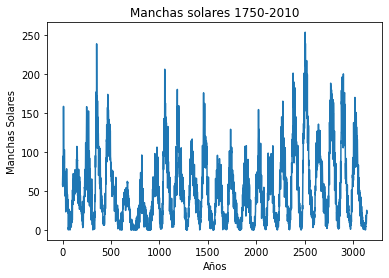

In [24]:
archivo=open('sunspots.txt')
meses=[]
manchas=[]
for linea in archivo:
    a=linea.split('\t')
    meses.append(int(a[0]))
    manchas.append(float(a[1]))
    
Manchas=np.array(manchas)
Meses=np.array(meses)

plt.figure(figsize=(12, 6), dpi=80)
fig, ax1 = plt.subplots()
#Colocamos una etiqueta en el eje X
ax1.set_xlabel('Años')
#Colocamos una etiqueta en el eje Y
ax1.set_ylabel('Manchas Solares')
#Colocamos una etiqueta en el eje X
ax1.set_title('Manchas solares 1750-2010')
#Creamos la grafica de barras utilizando 'Años' como eje X y 'Suma de periodos de 25 años' como eje y.
ax1.plot(meses, Manchas)

(b) Calcula el [promedio móvil](http://en.wikipedia.org/wiki/Moving_average). Dibújalo sobre el dibujo original.

<Figure size 960x480 with 0 Axes>

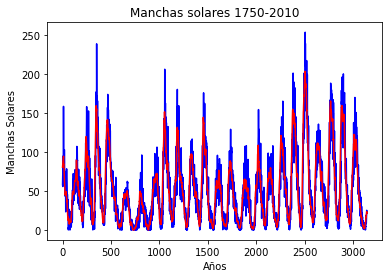

In [25]:
#Calculamos la media móvil en periodos de 12 meses y lo agregamos a MM
MM=[]
for i in range(3143):
    MM.append(mean(manchas[i:11+i]))

    
plt.figure(figsize=(12, 6), dpi=80)
fig, ax1 = plt.subplots()
#Colocamos una etiqueta en el eje X
ax1.set_xlabel('Años')
#Colocamos una etiqueta en el eje Y
ax1.set_ylabel('Manchas Solares')
#Colocamos una etiqueta en el eje X
ax1.set_title('Manchas solares 1750-2010')
#Creamos la grafica de barras utilizando 'Años' como eje X y 'Suma de periodos de 25 años' como eje y.
ax1.plot(meses, Manchas,'b', label='Manchas solares')
ax1.plot(meses,MM,'r', label='MM 12 meses')

## Pregunta 6
Utiliza el archivo `starts.txt` (localizado en la carpeta `data`), el cual contiene la temperatura y magnitud de varias estrellas en la Vía Lactea.  Usa esta información para dibujar un **scatter plot** del logaritmo del brillo vs. la temperatura (en **K**). Este diagrama se conoce como diagrama de [Hertzsprung-Russell](http://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram). 

(a) Lee el archivo y dibuja los datos tal como vienen en el archivo. Agrega etiquetas y formatea la gráfica de tal manera que tenga calidad de publicación.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


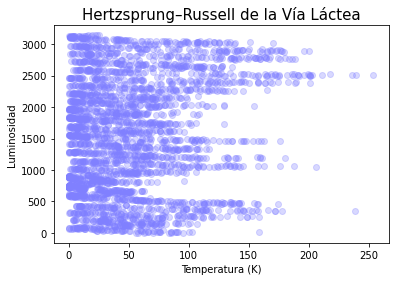

In [43]:
archivo=open('stars.txt')
x=[]
y=[]
for linea in archivo:
    a=linea.split(' ')
    x.append(float(a[0]))
    y.append(float(a[1]))
    
X=np.array(manchas)
Y=np.array(meses)

x = np.arange(0, 100)
y = np.random.rand(100)  


fig, ax2 = plt.subplots()
ax2.set_title('Hertzsprung–Russell de la Vía Láctea',fontsize=15)
ax2.set_xlabel('Temperatura (K)',fontsize=10)
ax2.set_ylabel('Luminosidad',fontsize=10)
ax2.scatter(X,Y, c=(.5,.5,1), alpha=.3)

(b) Ahora usa el `xlim()` y  `ylim()` para que quede de manera correcta el diagrama. Hay regiones donde las estrellas parece que se aglomeran, ve el archivo de [wikipedia]( http://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) y agrega anotaciones para explicarlas.

In [ ]:
#CODIGO BASURA
'''
#Creamos nuevos arrays para que sean los datos de cada 25 años empezando en 1750
Anios=[]
for i in range(1,1+int(1+(2020-1750)/25)):
    Anios.append(1750+(i-1)*25)
Anios.append(2010)

Manc=[]
Manc.append()
for i in range(1, 12):
    a=sum(Manchas[12+300*(i-1):12+300*i])
    Manc.append(a)

print(Anios)
print(Manc)
'''